3. Where possible, certainly for any variable of particular interest-examine **exploratory visualizations**.

## Visualization

- The objective of visualization is to **reveal hidden information** through simple charts and diagrams.
- It is instrumental in **identifying patterns and relationships** among groups of variables. 
- Visualization techniques depend on the **type of variables**.

## Tools for Displaying Single Variables

### Histograms

- Histograms are the most common graphical tool to **represent continuous data**. 
- A histogram divides the data into **bins**, counts the number of data points falling into each bin, and shows the **bins on the horizontal axis** and the **frequency on thevertical axis**.
- The **class width** (bin width) has an impact on the shape of the histogram.

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#For college_df, produce some histograms for a few of the quantitative variables.
#change numbers of bins 
#first import the data into session
import pandas as pd
college_df = pd.read_csv("datasets/College.csv", index_col = 0)

### Subplotting with matplotlib

Using the College data set, let's create a **2x2 subplot** with a subplot for each of the following variables:

- Apps
- perc.alumni
- S.F.Ratio
- Expend

where each subplot is a histogram.

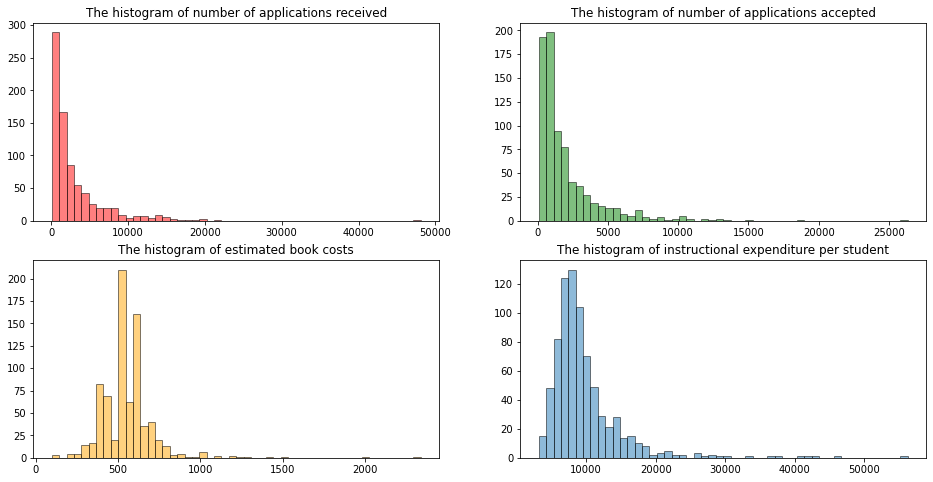

In [3]:
import matplotlib.pyplot as plt
#create subplots
figs, axs = plt.subplots(2, 2, figsize = (16,8)) #figsize: width, height, respectively.
#axs object is a 2 by 2 numpy array
#type(axs)
#axs
#you can change the number of bins, as you wish
#could not give y axis title for each subplot
n_bins = 50
#the frequency of number applications decreases as magnitude increases
axs[0,0].hist(college_df['Apps'], bins = n_bins, color = 'red', alpha = 0.5, edgecolor = 'black')
axs[0,0].set_title('The histogram of number of applications received')
axs[0,1].hist(college_df['Accept'], bins = n_bins, color = 'green', alpha = 0.5, edgecolor = 'black')
axs[0,1].set_title('The histogram of number of applications accepted')
#the distribution of estimated book costs is symmetric. there a few expensive books used at colleges.
axs[1,0].hist(college_df['Books'], bins = n_bins, color = 'orange', alpha = 0.5, edgecolor = 'black')
axs[1,0].set_title('The histogram of estimated book costs')
axs[1,1].hist(college_df['Expend'], bins = n_bins, alpha = 0.5, edgecolor = 'black')
axs[1,1].set_title('The histogram of instructional expenditure per student')
#plt.tight_layout()
plt.show(figs) #plt.show() turns off printing the data array etc

### Density Plots

- A **density plot** is a **smoothed, continuous** version of a **histogram** estimated from the data. 
- A point is drawn at the top of every individual rectangular bin and all of these points are then connected together to make a single smooth density estimation. (Try to make a connection between **Rieman sums** and its limit as the number of bins goes to infinity (or width of the bins approaches to zero) and **histograms**).
- The height of the curve is adjusted so that the **total area under the curve integrates to one**.

### Histograms, Density Plots with seaborn

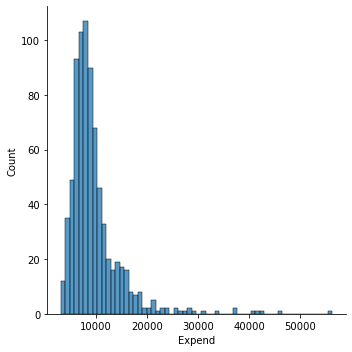

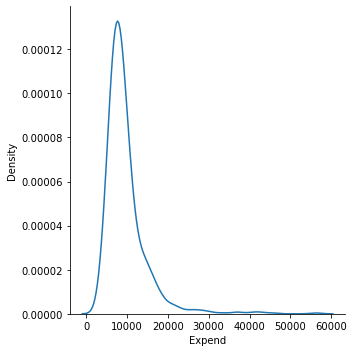

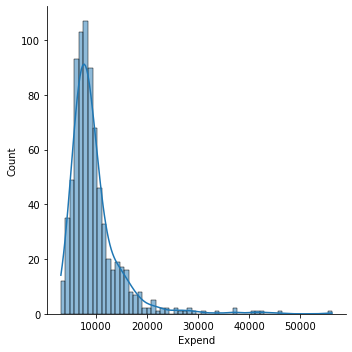

In [4]:
import seaborn as sns
#draw a histogram with seaborn, kind="hist" is default
sns.displot(x = college_df.Expend, kind="hist") 
#draw a denstiy plot with seaborn with kernel density
sns.displot(x = college_df.Expend, kind="kde")
#overlay histogram with a density plot 
sns.displot(x = college_df.Expend, kde=True)

## Tools for Displaying a Single Variable with repect to a Categorical Variable

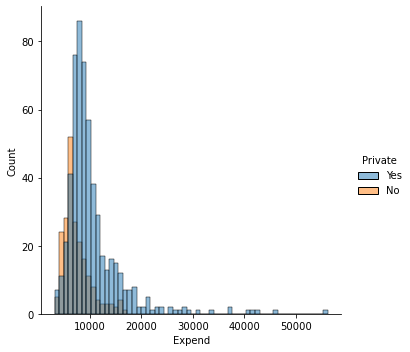

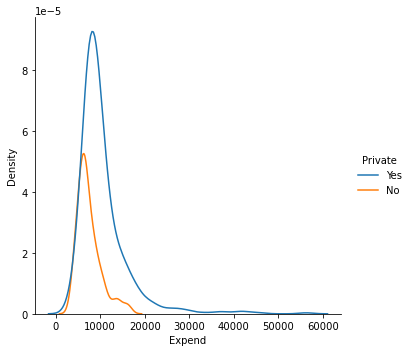

In [5]:
#Each kind of plot can be drawn separately for subsets of data using **hue mapping**
#Investigate how the expenditure is changing with respect to school type
sns.displot(data = college_df, x = "Expend", hue = "Private", kind = "hist") 
sns.displot(data = college_df, x = "Expend", hue = "Private", kind = "kde")
#as you can see instructional expenditure is  higher in private schools compared to non-private ones

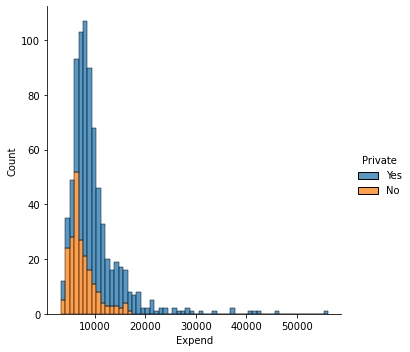

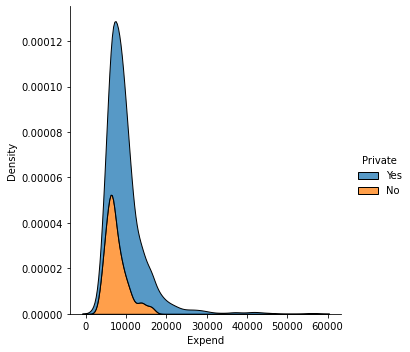

In [6]:
#alternatively you can prefer stacked plots
sns.displot(data = college_df, x = "Expend", hue = "Private", kind = "hist", multiple = "stack") 
sns.displot(data = college_df, x = "Expend", hue = "Private", kind = "kde", multiple = "stack")

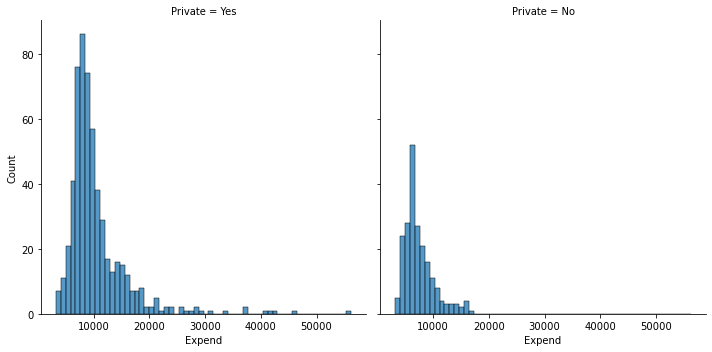

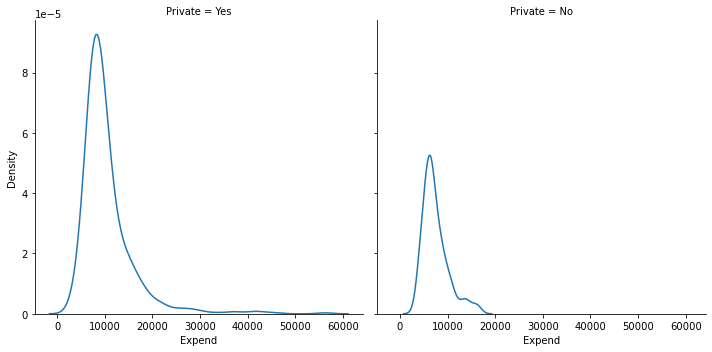

In [7]:
#faceting, map the expenditure variable into private variable with col argument
sns.displot(data = college_df, x = "Expend", col = "Private", kind = "hist") 
sns.displot(data = college_df, x = "Expend", col = "Private", kind = "kde")

### Boxplots

- Boxplots are used to describe the shape of data distribution.
- We can also use the boxplots the to describe the shape of data distribution with respect to the levels of a categorical variable.
- It also enables us to identify outliers where an observation is considered as an outlier if it is either less than Q1 - 1.5 IQR or greater than Q3 + 1.5 IQR, with IQR = Q3 - Q1. 
- This rule is conservative and often too many points are identified as outliers. Hence sometimes only those points outside of [Q1 - 3 IQR, Q3 + 3 IQR] are only identified as outliers. 

Using the College data set, we will create a new **categorical variabl**e, called `Elite`, by binning the `Top10perc` variable. 
We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.

In [8]:
#attach a new column to the college df
import pandas as pd
college_df = pd.read_csv("datasets/College.csv", index_col = 0)

#this should be much more smarter.
#i tried boolean indexing below, but it worked first, but,
#it did not work later.
#college_df['Elite'] = "No"
#college_df.Elite[college_df.Top10perc>50] = "Yes"

#alternatively, a bit longer way to add a new column to a data frame
elite = []
for i in college_df['Top10perc']:
        if i > 50 :    elite.append('Yes')
        else:          elite.append('No')
        
college_df['Elite'] = elite 
#college_df.head()

<AxesSubplot:xlabel='Elite', ylabel='Grad.Rate'>

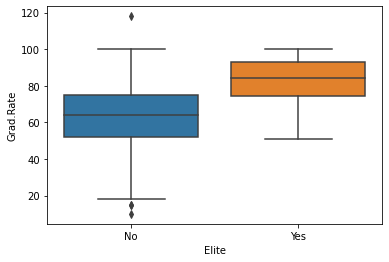

In [9]:
#compare the graduation rates with respect to school's elite status
sns.boxplot(data = college_df, x = "Elite", y = "Grad.Rate")
#as you can see in the elite schools, the graduate rate is higher compared to non-elite ones
#we can see a few outliers in the non-elite schools. while graduation rate is
#very high in some non-elite schools, graduation rate is very low in some non-elite schools

<AxesSubplot:xlabel='Private', ylabel='Outstate'>

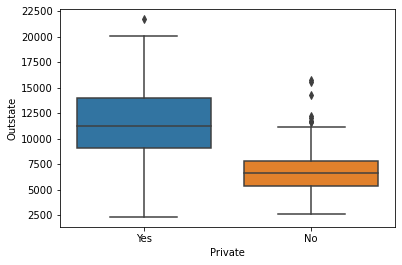

In [10]:
# produce side-by-side boxplots of Outstate versus Private.
sns.boxplot(data = college_df, x = "Private", y = "Outstate")
#as you can see in private schools, out-state tution fees are also very high.
#if you born in Arizona, but, want to study in a private school, such as in Boston,
#you are more likely to pay for higher tution rates.

## Tools for Displaying Relationships Between Two Variables
## Scatterplot
- The most conventional way to display relationships between two variables is a scatterplot. 
- It shows the direction and strength of association between two variables.

<AxesSubplot:xlabel='Outstate', ylabel='Grad.Rate'>

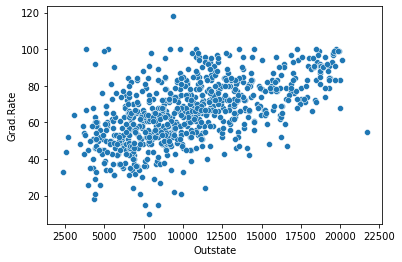

In [11]:
#get a scatter plot of outstat tution fee and graduation rate
sns.scatterplot(data = college_df, x = "Outstate", y = "Grad.Rate") 
#As tuition fee increases, the high graduation rate increases

<AxesSubplot:xlabel='Outstate', ylabel='Grad.Rate'>

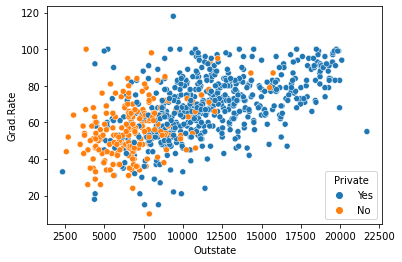

In [12]:
#how above graph chages with respect to school type?
sns.scatterplot(data = college_df, x = 'Outstate', y = "Grad.Rate", hue = 'Private') 

## Tools for Displaying More Than Two Variables

### Scatterplot Matrix
- Displaying more than two variables on a single scatterplot is not possible. 
- A **scatterplot matrix** is one possible visualization of three or more continuous variables taken two at a time.

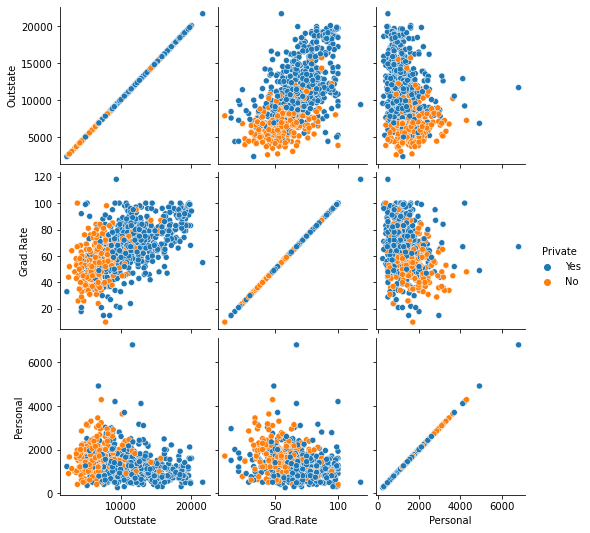

In [13]:
#let's get a pairwise matrix plot of some variables. 
#diag_kind = None, otherwise histogram appears on the diagonals.
sns.pairplot(college_df, vars = ['Outstate', 'Grad.Rate', 'Personal'], diag_kind = None, hue = 'Private')

In [14]:
import numpy as np
df = college_df[['Outstate', 'Grad.Rate', 'Personal']]
df.corr()

,Outstate,Grad.Rate,Personal
Outstate,1.000000,0.571290,-0.299087
Grad.Rate,0.571290,1.000000,-0.269344
Personal,-0.299087,-0.269344,1.000000


In [15]:
import session_info
session_info.show()